In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5,1,'Charge Vs BMI')

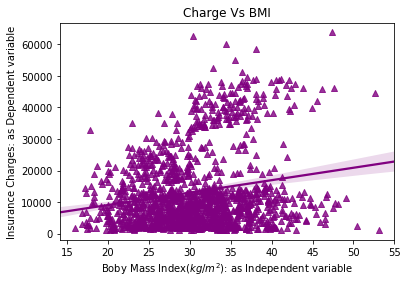

In [4]:
sns.regplot(x='bmi',y='charges',data=data,marker='^',color='purple')
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5,1,'Missing value in the dataset')

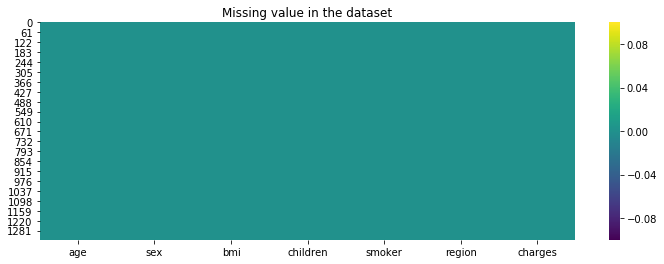

In [11]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cmap='viridis')
plt.title('Missing value in the dataset')

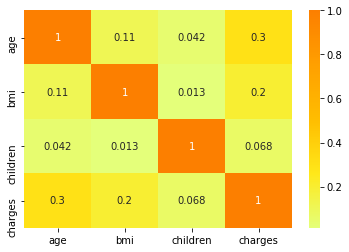

In [14]:
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


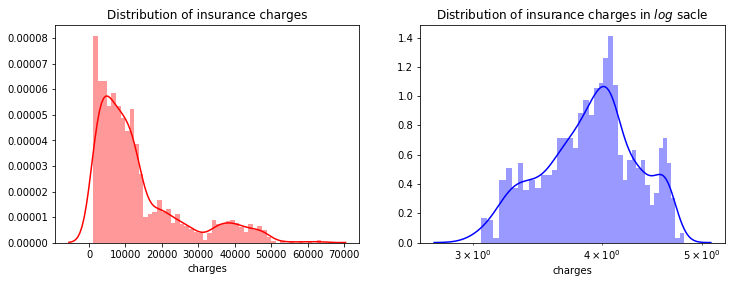

In [16]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(1,2,1)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')


ax = f.add_subplot(1,2,2)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')


Text(0.5,1,'Violin plot of Charges vs smoker')

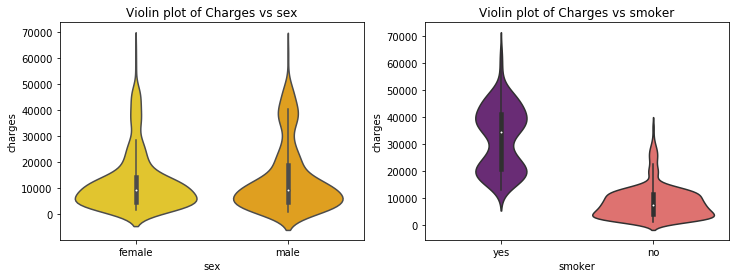

In [17]:
f =  plt.figure(figsize=(12,4))
ax = f.add_subplot(1,2,1)
sns.violinplot(x='sex',y='charges',data=data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(1,2,2)
sns.violinplot(x='smoker', y='charges',data=data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5,1,'Violin plot of charges vs children')

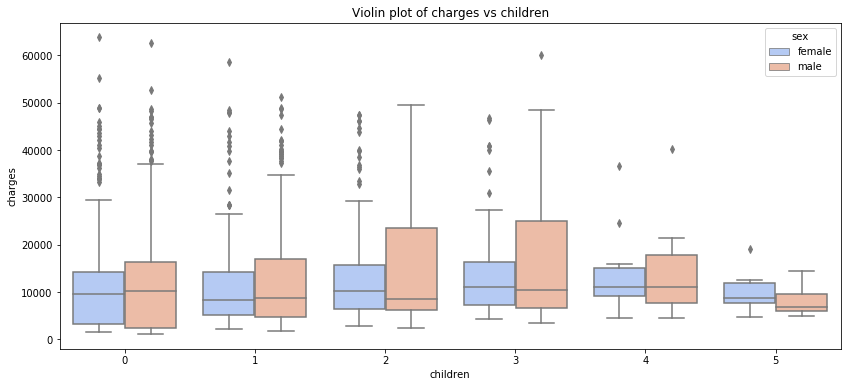

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=data,palette='coolwarm')
plt.title('Violin plot of charges vs children')

In [19]:
data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5,1,'Violin plot of charges vs region')

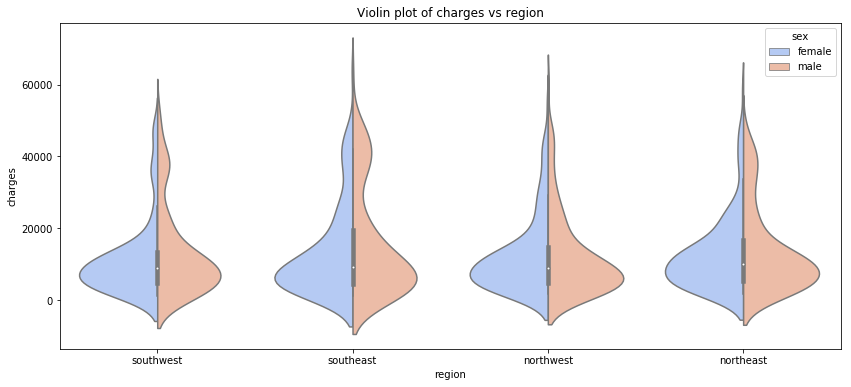

In [21]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=data,palette='coolwarm',split=True)
plt.title('Violin plot of charges vs region')

Text(0.5,1,'Scatter plot of Charges vs bmi')

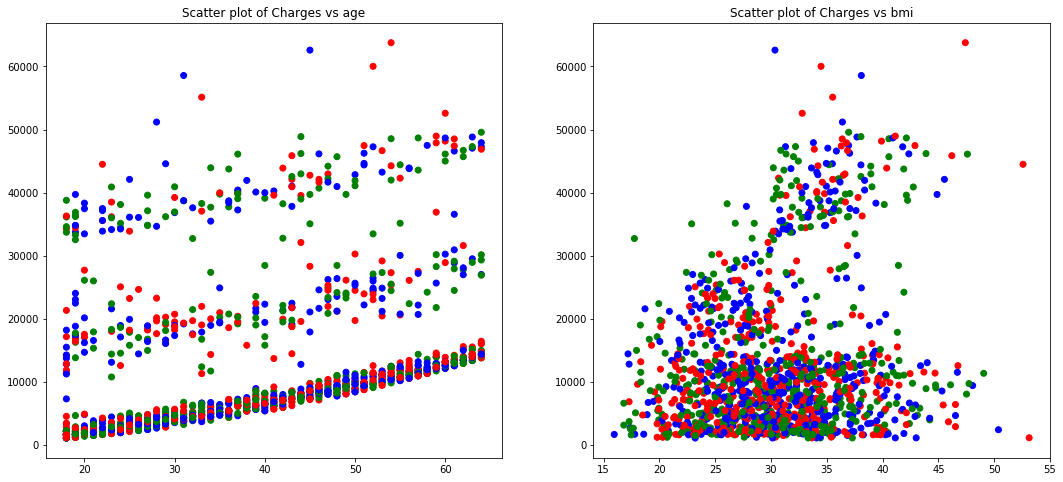

In [41]:
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(1,2,1)
# sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
plt.scatter(x='age',y='charges',data=data,c=['r','b','g'])
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(1,2,2)
plt.scatter(x='bmi',y='charges',data=data,c=['r','b','g'])  
ax.set_title('Scatter plot of Charges vs bmi')


In [42]:
categorical_columns = ['sex','children', 'smoker', 'region']
data_encode = pd.get_dummies(data = data, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [45]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(data_encode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [46]:
data_encode['charges'] = np.log(data_encode['charges'])

In [47]:
data_encode['age_smoker_yes'] = data_encode['age']* data_encode['smoker_yes']
data_encode['age_sex_male'] = data_encode['age']* data_encode['sex_male']

data_encode.shape

(1338, 15)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X =data_encode.drop('charges',axis=1)
y =data_encode['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [51]:
X_train_new = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_new = np.c_[np.ones((X_test.shape[0],1)),X_test]
theta = np.matmul(np.linalg.inv(np.matmul(X_train_new.T,X_train_new)),np.matmul(X_train_new.T,y_train))


In [62]:
parameter = ['theta_'+str(i) for i in range(X_train_new.shape[1])]
columns = ['intersect:x_0=1']+list(X.columns.values)
parameter_data = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_data

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,6.933947
1,theta_1,age,0.037384
2,theta_2,bmi,0.012043
3,theta_3,sex_male,-0.267692
4,theta_4,children_1,0.152573
5,theta_5,children_2,0.280255
6,theta_6,children_3,0.254635
7,theta_7,children_4,0.506222
8,theta_8,children_5,0.498391
9,theta_9,smoker_yes,2.784171


In [53]:
from sklearn.linear_model import LinearRegression

In [63]:
linear = LinearRegression()
linear.fit(X_train,y_train)
sk_theta = [linear.intercept_]+list(linear.coef_)
parameter_data = parameter_data.join(pd.Series(sk_theta,name='Sklearn_theta',index=np.arange(15)))
parameter_data

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,6.933947,6.933947
1,theta_1,age,0.037384,0.037384
2,theta_2,bmi,0.012043,0.012043
3,theta_3,sex_male,-0.267692,-0.267692
4,theta_4,children_1,0.152573,0.152573
5,theta_5,children_2,0.280255,0.280255
6,theta_6,children_3,0.254635,0.254635
7,theta_7,children_4,0.506222,0.506222
8,theta_8,children_5,0.498391,0.498391
9,theta_9,smoker_yes,2.784171,2.784171


In [65]:
y_pred_norm =  np.matmul(X_test_new,theta)

In [70]:
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_new.shape[0]
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
display(J_mse,R_square)

0.1568318048680425

0.8154227058930674

In [67]:
y_pred_sk = linear.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error

In [71]:
J_mse_sk = mean_squared_error(y_pred_sk,y_test)
R_square_sk = linear.score(X_test,y_test)
display(J_mse_sk,R_square_sk)

0.15683180486793147

0.8154227058931979

In [72]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
X_test_new = sm.add_constant(X_test)
ols = sm.OLS(endog=y_train, exog= X_train_new).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     271.0
Date:                Tue, 18 Sep 2018   Prob (F-statistic):          9.98e-315
Time:                        20:00:39   Log-Likelihood:                -482.19
No. Observations:                 936   AIC:                             994.4
Df Residuals:                     921   BIC:                             1067.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9339      0.089  

In [73]:
X_train_new1 = X_train.drop('region_northwest',axis=1)
X_test_new1 = X_test.drop('region_northwest',axis=1)
X_train_new2 = sm.add_constant(X_train_new1)
X_test_new2 = sm.add_constant(X_test_new1)
ols = sm.OLS(endog=y_train, exog= X_train_new2).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     291.2
Date:                Tue, 18 Sep 2018   Prob (F-statistic):          1.87e-315
Time:                        20:03:34   Log-Likelihood:                -483.39
No. Observations:                 936   AIC:                             994.8
Df Residuals:                     922   BIC:                             1063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9028      0.087  

In [75]:
y_pred_ols = ols.predict(X_test_new2)

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


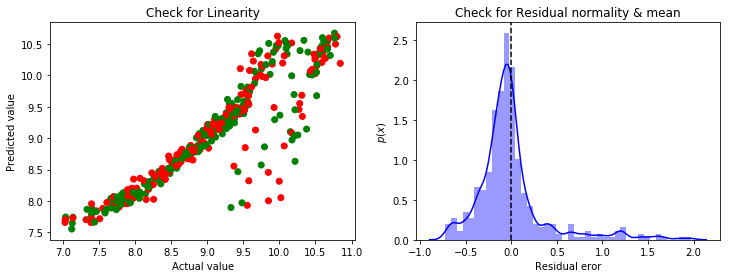

In [78]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(1,2,1)
plt.scatter(y_test,y_pred_ols,c=['r','g'])
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

ax = f.add_subplot(1,2,2)
sns.distplot((y_test - y_pred_ols),ax=ax,color='b')
plt.axvline((y_test - y_pred_ols).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

In [79]:
import scipy as sp

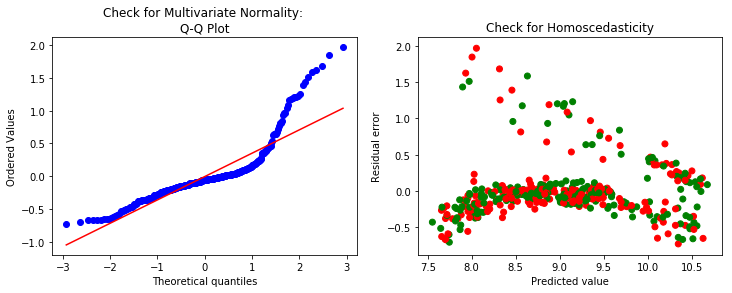

In [83]:
f,ax = plt.subplots(1,2,figsize=(12,4))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_ols),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')
plt.scatter(y=(y_test-y_pred_ols),x=y_pred_ols,c=['r','g'])
ax[1].set_title('Check for Homoscedasticity')
plt.xlabel('Predicted value')
plt.ylabel('Residual error');

In [84]:
VIF = 1/(1- ols.rsquared)
VIF

5.105774693629873